# Data Preprocessing

## 1. Import Library

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Data Loading

In [30]:
data = pd.read_csv('employee.csv')
data

,no,nama,tanggal_lahir,jenis_kelamin,gaji
0,1,ani,3/2/1993,perempuan,1000000
1,2,budi,3/1/1992,laki-laki,2000000
2,3,susi,4/5/2000,perempuan,1350000
3,4,wati,5/20/1995,perempuan,10000000
4,5,ati,4/23/1994,perempuan,3400000
5,6,ina,5/6/1991,perempuan,5000000
6,7,nia,4/5/1990,perempuan,2500000
7,8,dodi,4/3/1998,laki-laki,3400000
8,9,dedi,6/20/1993,laki-laki,8900000
9,10,roni,9/20/2001,laki-laki,2100000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   no             10 non-null     int64 
 1   nama           10 non-null     object
 2   tanggal_lahir  10 non-null     object
 3   jenis_kelamin  10 non-null     object
 4   gaji           10 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


## 3. Data Visualization

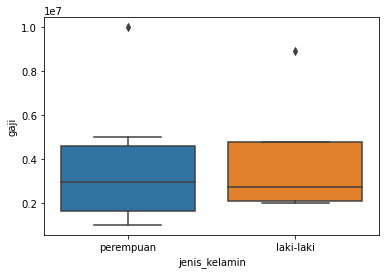

In [5]:
sns.boxplot(data = data, x = 'jenis_kelamin', y = 'gaji')
plt.show()

## 3. Data Preprocessing

### One Hot Encoding

In [6]:
jk_dummies = pd.get_dummies(data['jenis_kelamin'], prefix='jk')
jk_dummies.head()

,jk_laki-laki,jk_perempuan
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [7]:
data_jk = pd.concat([data, jk_dummies], axis = 1)
data_jk.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan
0,1,ani,3/2/1993,perempuan,1000000,0,1
1,2,budi,3/1/1992,laki-laki,2000000,1,0
2,3,susi,4/5/2000,perempuan,1350000,0,1
3,4,wati,5/20/1995,perempuan,10000000,0,1
4,5,ati,4/23/1994,perempuan,3400000,0,1


### Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [11]:
data_jk['jk_label'] = le.fit_transform(data['jenis_kelamin'])
data_jk.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan,jk_label
0,1,ani,3/2/1993,perempuan,1000000,0,1,1
1,2,budi,3/1/1992,laki-laki,2000000,1,0,0
2,3,susi,4/5/2000,perempuan,1350000,0,1,1
3,4,wati,5/20/1995,perempuan,10000000,0,1,1
4,5,ati,4/23/1994,perempuan,3400000,0,1,1


### Standar Scaler

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()

In [33]:
data['gaji'].to_numpy()

array([ 1000000,  2000000,  1350000, 10000000,  3400000,  5000000,
        2500000,  3400000,  8900000,  2100000], dtype=int64)

In [34]:
data_jk['sc_gaji'] = sc.fit_transform(data['gaji'].to_numpy().reshape(-1, 1))
data_jk.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan,jk_label,sc_gaji
0,1,ani,3/2/1993,perempuan,1000000,0,1,1,-1.001779
1,2,budi,3/1/1992,laki-laki,2000000,1,0,0,-0.663911
2,3,susi,4/5/2000,perempuan,1350000,0,1,1,-0.883525
3,4,wati,5/20/1995,perempuan,10000000,0,1,1,2.039035
4,5,ati,4/23/1994,perempuan,3400000,0,1,1,-0.190896


### Min-Max Scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
mms = MinMaxScaler()

In [38]:
data_jk['mms_gaji'] = mms.fit_transform(data['gaji'].to_numpy().reshape(-1, 1))
data_jk.head()

,no,nama,tanggal_lahir,jenis_kelamin,gaji,jk_laki-laki,jk_perempuan,jk_label,sc_gaji,mms_gaji
0,1,ani,3/2/1993,perempuan,1000000,0,1,1,-1.001779,0.000000
1,2,budi,3/1/1992,laki-laki,2000000,1,0,0,-0.663911,0.111111
2,3,susi,4/5/2000,perempuan,1350000,0,1,1,-0.883525,0.038889
3,4,wati,5/20/1995,perempuan,10000000,0,1,1,2.039035,1.000000
4,5,ati,4/23/1994,perempuan,3400000,0,1,1,-0.190896,0.266667


## 4. Comparison

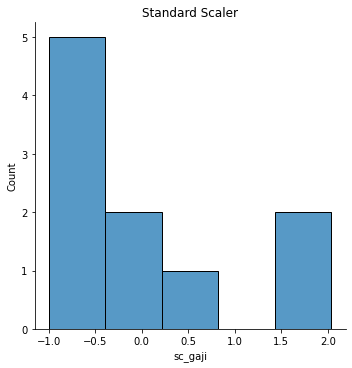

In [40]:
sns.displot(data_jk['sc_gaji'])
plt.title('Standard Scaler')
plt.show()

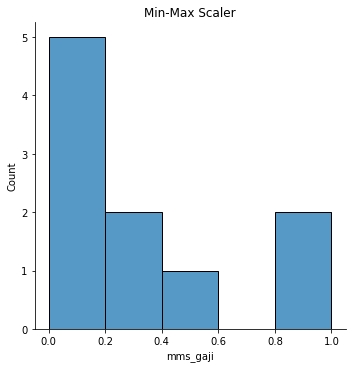

In [41]:
sns.displot(data_jk['mms_gaji'])
plt.title('Min-Max Scaler')
plt.show()

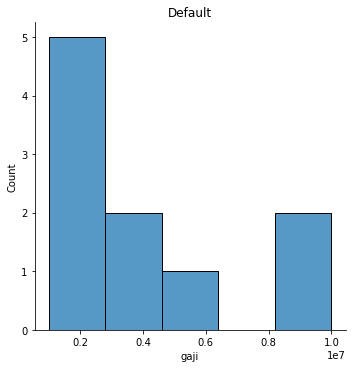

In [42]:
sns.displot(data_jk['gaji'])
plt.title('Default')
plt.show()